https://medium.com/@pragya_paudyal/diabetics-prediction-using-logistic-regression-in-python-e51b90630f2f

https://www.javatpoint.com/logistic-regression-in-machine-learning

https://medium.com/the-researchers-guide/binary-logistic-regression-using-python-research-oriented-modelling-and-interpretation-49b025f1b510

https://github.com/rahul-raoniar/Rahul_Raoniar_Blogs



---



#Step 1: Import Dataset

##1a) Import Libraries

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1b) Import Diabetes Dataset

In [87]:
diabetes = pd.read_csv("https://www.alvinang.sg/s/diabetes.csv")

In [88]:
diabetes.sample(5)

#pregnant: Number of times pregnant
#glucose: Plasma glucose concentration (glucose tolerance test)
#pressure: Diastolic blood pressure (mm Hg)
#triceps: Triceps skin fold thickness (mm)
#insulin: 2-Hour serum insulin (mu U/ml)
#mass: Body mass index (weight in kg/(height in m)\²)
#pedigree: Diabetes pedigree function
#age: Age (years)

#diabetes: diabetes case (pos/neg)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
242,2,105,80,45,191,33.7,0.711,29,pos
38,4,123,80,15,176,32.0,0.443,34,neg
82,6,134,70,23,130,35.4,0.542,29,pos
177,12,88,74,40,54,35.3,0.378,48,neg
151,0,137,68,14,148,24.8,0.143,21,neg


##1c) Map Negative to 0 and Positive to 1

In [89]:
diabetes['diabetes'] = diabetes['diabetes'].map({'neg':0, 'pos':1})



---



#Step 2: Plotting

##2a) Counting the Number of Diabetics

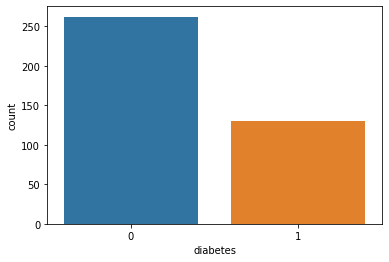

In [90]:
sns.countplot(x='diabetes', data=diabetes)

##2b) Does Number of Times being Pregnant Cause Diabetes?

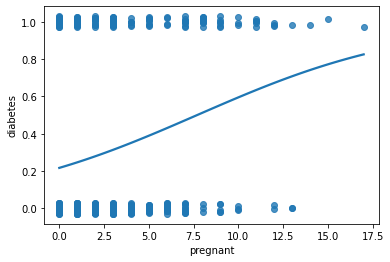

In [91]:
sns.regplot(x='pregnant', y='diabetes', y_jitter=0.03, data=diabetes, logistic = True, ci = None)

plt.show()
#pregnant: Number of times pregnant
#seems like if you are pregnanre more than 12 times....higher chance 
# of being diabetic

##2c) Does Glucose Level cause Diabetes?

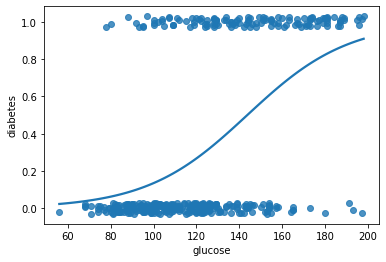

In [92]:
sns.regplot(x='glucose', y='diabetes', y_jitter=0.03, data=diabetes, logistic = True, ci = None)

plt.show()

#glucose: Plasma glucose concentration (glucose tolerance test)
#the stronger the glucose level, the more likely for diabetes to occur

##2d) Does Blood Pressure Cause Diabetes?

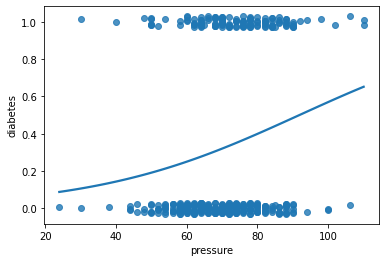

In [93]:
sns.regplot(x='pressure', y='diabetes', y_jitter=0.03, data=diabetes, logistic = True, ci = None)

plt.show()

#pressure: Diastolic blood pressure (mm Hg)
#quite hard to gauge...

##2e) Does Triceps Skin Thickness Cause Diabetes?

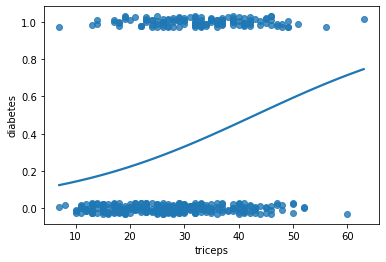

In [94]:
sns.regplot(x='triceps', y='diabetes', y_jitter=0.03, data=diabetes, logistic = True, ci = None)

plt.show()

#triceps: Triceps skin fold thickness (mm)
#quite hard to tell...

##2f) Does Insulin level cause Diabetes?

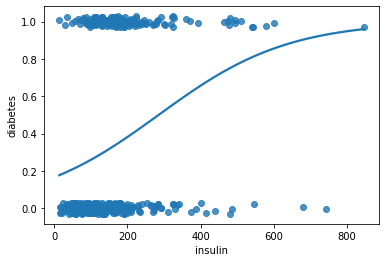

In [95]:
sns.regplot(x='insulin', y='diabetes', y_jitter=0.03, data=diabetes, logistic = True, ci = None)

plt.show()

#insulin: 2-Hour serum insulin (mu U/ml)
#seems like there maybe some outliers we need to remove (at the ends)
#in order for us to have a better gauge....

##2g) Does BMI Cause Diabetes?

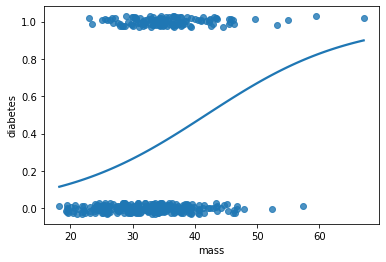

In [96]:
sns.regplot(x='mass', y='diabetes', y_jitter=0.03, data=diabetes, logistic = True, ci = None)

plt.show()

#mass: Body mass index (weight in kg/(height in m)\²)
#the heavier the mass, the more likelihood for diabetes

##2h) Does Pedigree Cause Diabetes?

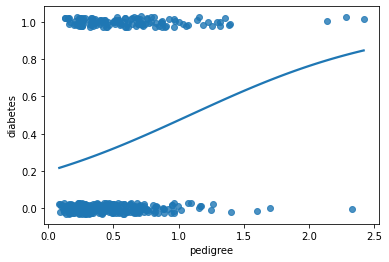

In [97]:
sns.regplot(x='pedigree', y='diabetes', y_jitter=0.03, data=diabetes, logistic = True, ci = None)

plt.show()

#pedigree: Diabetes pedigree function
#not so sure what Pedigree is...

##2i) Does Age Cause Diabetes?

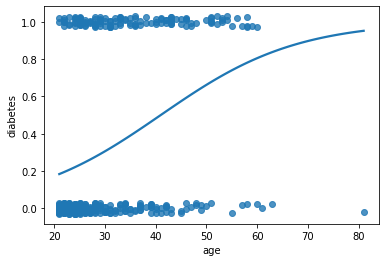

In [98]:
sns.regplot(x='age', y='diabetes', y_jitter=0.03, data=diabetes, logistic = True, ci = None)

plt.show()

#age: Age (years)
#seems like if we removed the outliers (at the ends) 
#we might be able to decipher the "Threshold Value" to be around past 
#25 years old to have a higher likelihood of diabetes?

# Conclusion:
- For now, I've only managed to source out 'Glucose' and 'Mass' that can be predicted using the Logit curve.
- However, I believe that if outliers were removed from most of the other columns / features, the Logistics curve would have fitted better.
- And thereafter we can use Logistics Regression for Predicting those columns. 



---



##Step 3: Extract 'Glucose' and 'Mass' out from the Dataset

In [99]:
diabetes

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26,1
388,1,128,88,39,110,36.5,1.057,37,1
389,2,88,58,26,16,28.4,0.766,22,0
390,10,101,76,48,180,32.9,0.171,63,0


In [100]:
x = diabetes.iloc[:, [1,5]].values
y = diabetes.iloc[:,8].values

#we take only Glucose and Mass into accouunt
#for predicting Diabetic or not



---



##Step 4: Train Test Split

In [101]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

#20% test size, 80% training size



---



#Step 5: Feature Scaling

In [102]:
from sklearn.preprocessing import StandardScaler    

st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)



---



#Step 6: Import Logistic Regression and Train the Model

##6a) Importing Logistic Regression Model

In [103]:
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression()  

##6b) Training the Model

In [104]:
model.fit(x_train, y_train)

#Training the Model

LogisticRegression()

##6c) Using the Model to Predict the x_test

In [105]:
#Predicting the test set result  
y_pred= model.predict(x_test)

In [106]:
x_test.shape

#79 rows 2 columns

(79, 2)

In [107]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])



---



#Step 7: Metrics

##7a) Confusion Matrix

In [108]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

print(cm)

[[52  2]
 [15 10]]


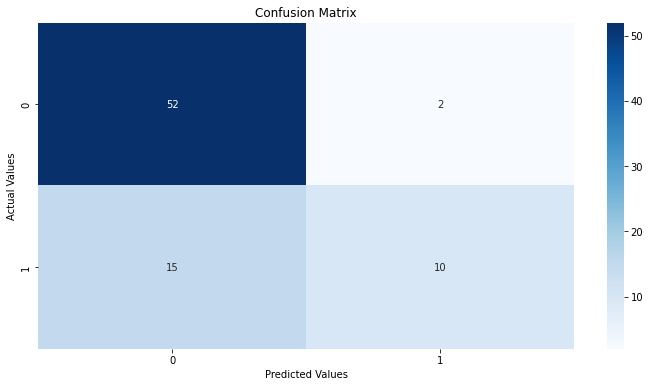

In [109]:
# plotting the confusion matrix
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

# 2 Type 1 Errors
# 15 Type 2 Errors

##7b) Accuracy Score

In [110]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

#total = 79 rows of data predicted
#17 errors / total 79 trials = 0.215
#1 - 0.215 = 78% accuracy

0.7848101265822784



---



#Step 8: Visualizing the Test Set Result 

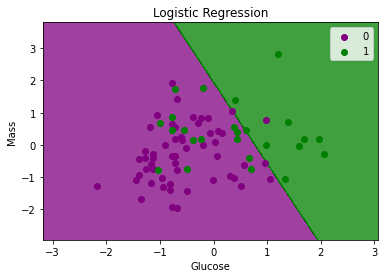

In [111]:
import numpy as np

from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
    
plt.title('Logistic Regression')  
plt.xlabel('Glucose')  
plt.ylabel('Mass')  
plt.legend()  
plt.show()

In [112]:
#the picture above is actually a 3D graph but looking from the top
#(planar view)
#the Z axis (or 3rd axis) represents 'Diabetic or not' but you can't
#see it from the chart. 

#we see that Mass doesn't impact Diabetics so much
#Whether you are High or Low body Mass, it doesn't really determine if you 
#will be diabetic

#Rather, the core focus is the Glucose level.
#The higher the Glucose leve, the more certainty for Diabetes.



---



#THE END


---

